In [1]:
import os

os.chdir("../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

from modular_splicing.module_substitution.experiment import (
    module_substitution_main as mse,
)
from modular_splicing.eclip.test_motifs.experiment import eclip_plot_for_paper as eclip
from modular_splicing.mrs.experiment import main_analysis as mrs
from modular_splicing.knockdown.experiment import plot_knockdown_experiment as knockdown

from modular_splicing.topline_results.renderer import plot_topline_results
from modular_splicing.topline_results.gather_results import results_for_main_figure

In [4]:
def text(ax, text):
    ax.axis("off")
    ax.text(
        0.5,
        0.5,
        text,
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize=20,
    )

/mnt/md0/ExpeditionsCommon/spliceai/Canonical/modular_splicing/mrs/load.py:81: RuntimeWarning: invalid value encountered in divide
  A5SS_fraction = (A5SS_fraction.T / A5SS_fraction.sum(1)).T


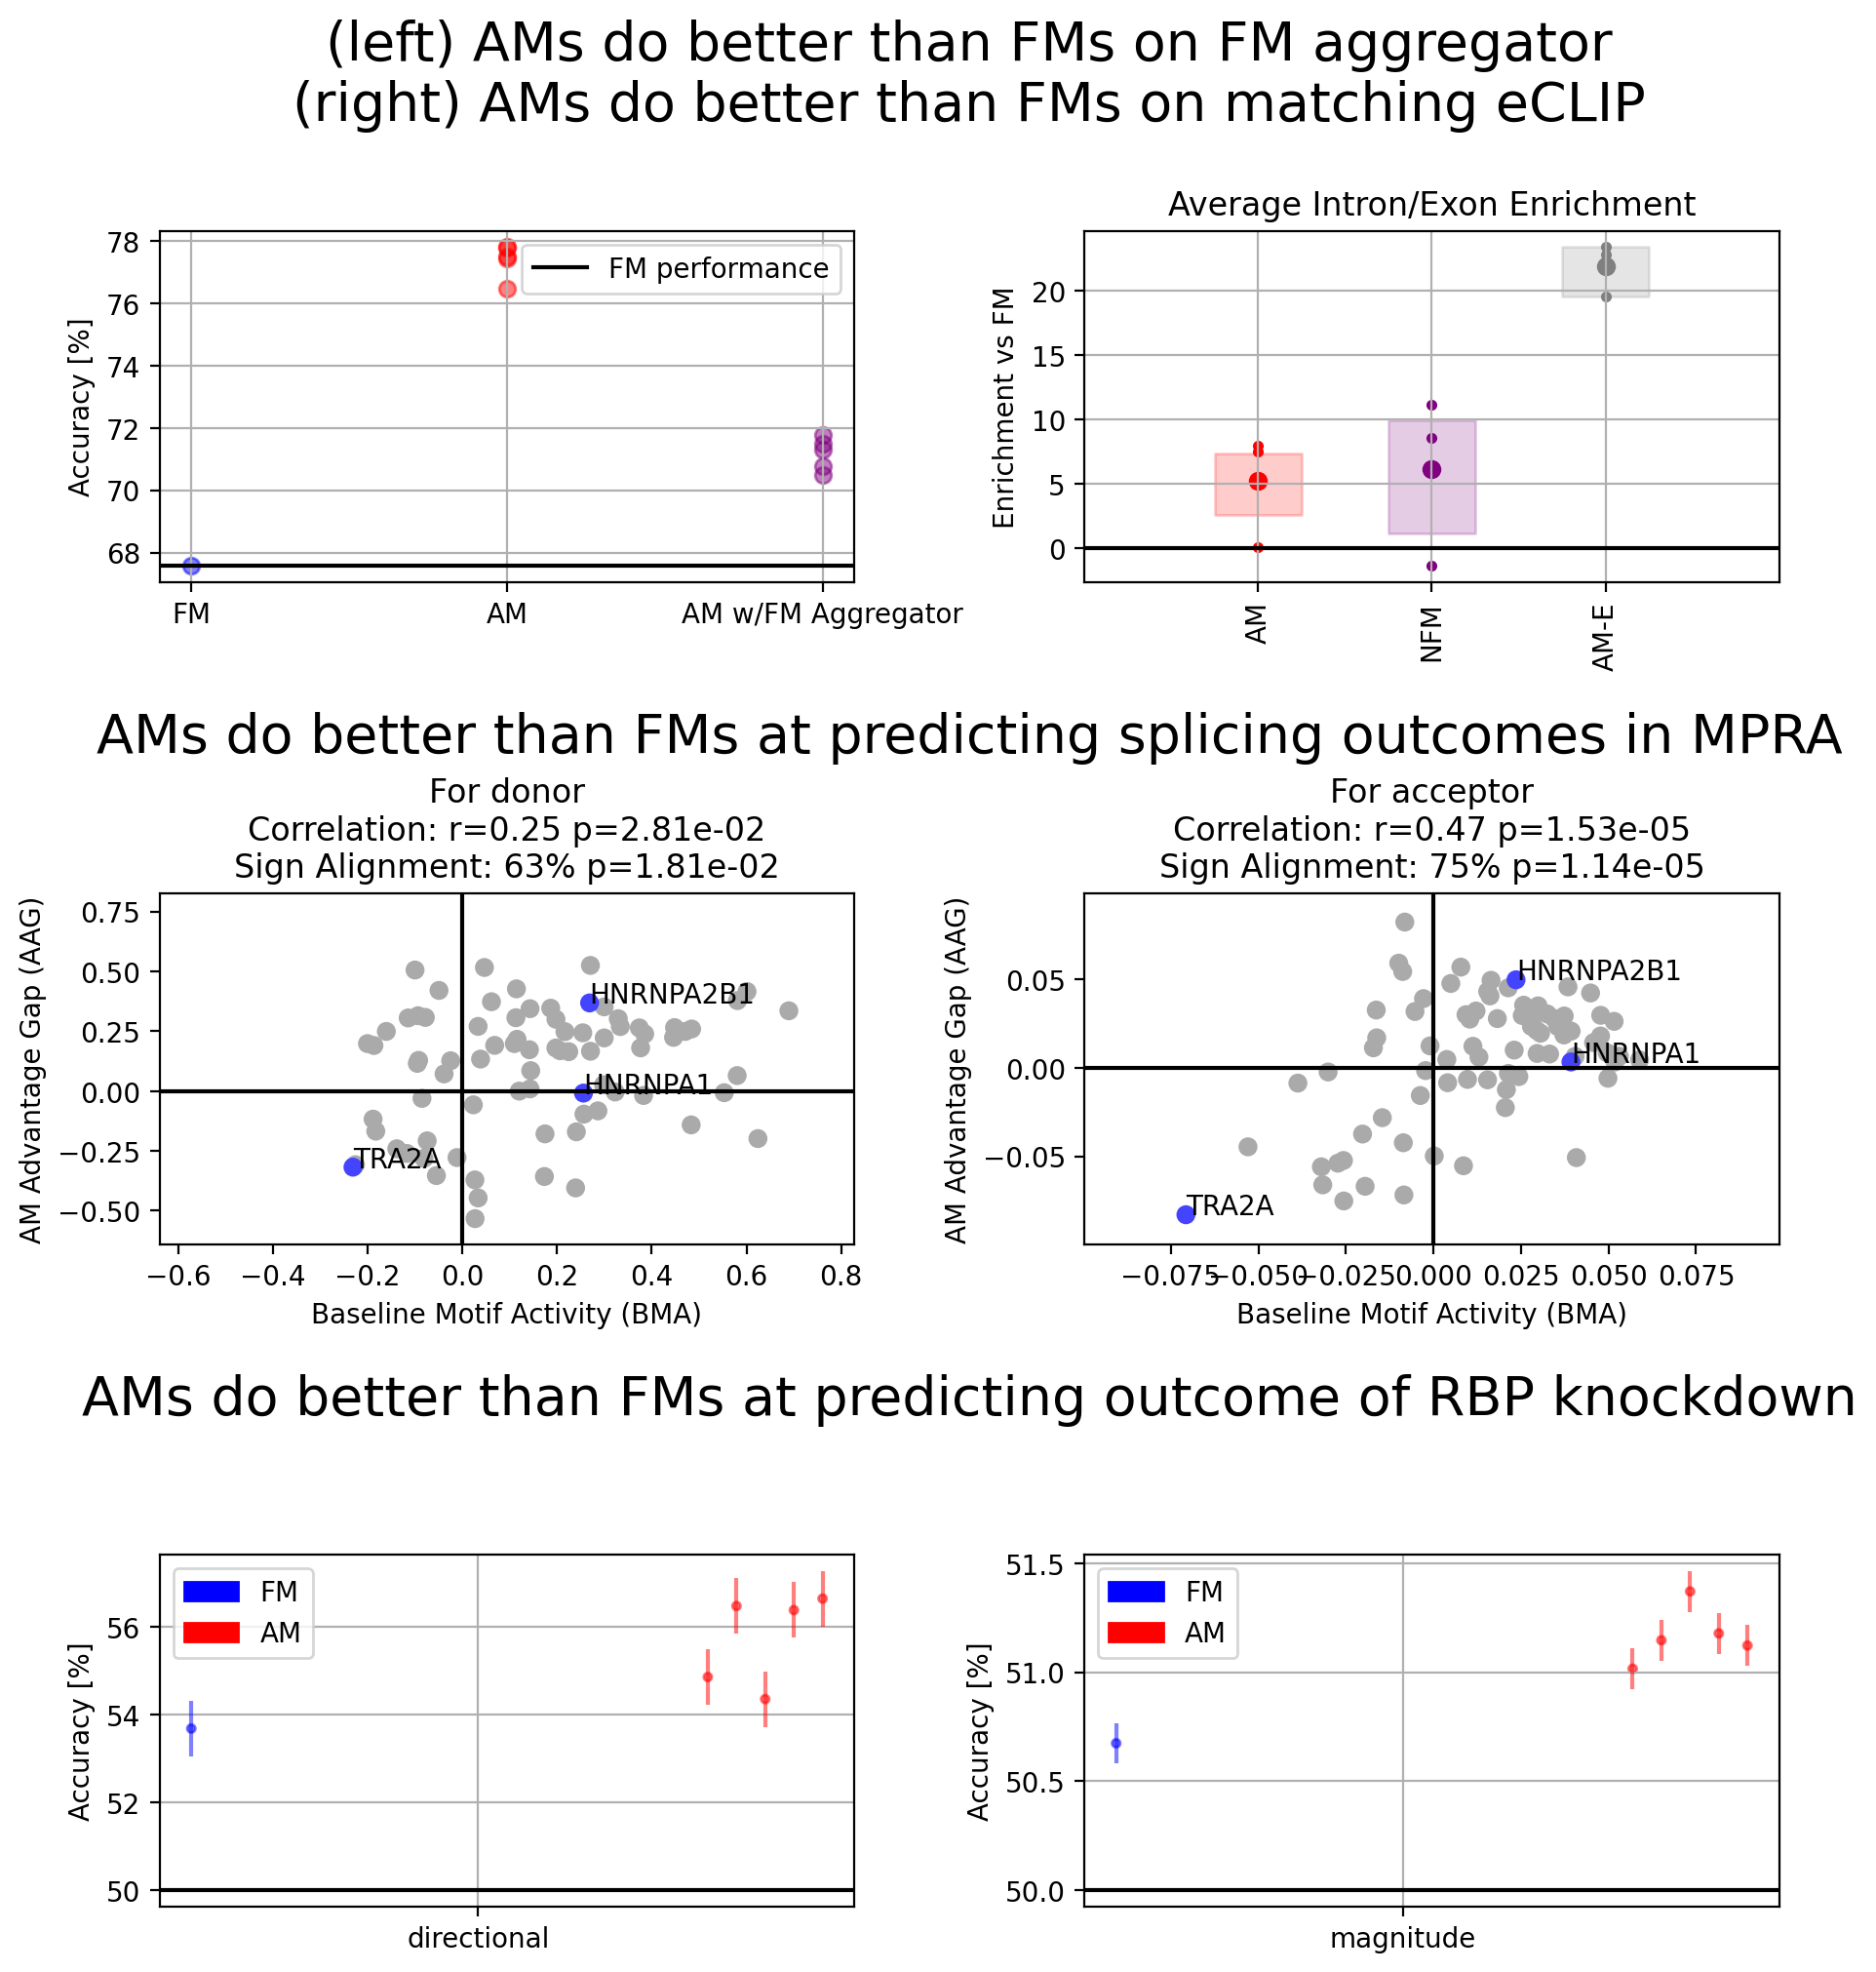

In [5]:
_, axs = plt.subplots(3, 2, figsize=(10, 10), dpi=200, tight_layout=True)

row_multiplier = 3

gridsize = 3 * (row_multiplier + 1), 2

text(
    plt.subplot2grid(gridsize, (0, 0), colspan=2),
    "(left) AMs do better than FMs on FM aggregator\n(right) AMs do better than FMs on matching eCLIP",
)


mse(plt.subplot2grid(gridsize, (1, 0), rowspan=row_multiplier))
eclip(
    plt.subplot2grid(gridsize, (1, 1), rowspan=row_multiplier),
    y_label="Enrichment vs FM",
)

text(
    plt.subplot2grid(gridsize, (row_multiplier + 1, 0), colspan=2),
    "AMs do better than FMs at predicting splicing outcomes in MPRA",
)

mrs(
    [
        plt.subplot2grid(gridsize, (row_multiplier + 2, 0), rowspan=row_multiplier),
        plt.subplot2grid(gridsize, (row_multiplier + 2, 1), rowspan=row_multiplier),
    ]
)

text(
    plt.subplot2grid(gridsize, (2 * row_multiplier + 2, 0), colspan=2),
    "AMs do better than FMs at predicting outcome of RBP knockdown",
)

knockdown(
    plt.subplot2grid(gridsize, (2 * row_multiplier + 3, 0), rowspan=row_multiplier),
    plt.subplot2grid(gridsize, (2 * row_multiplier + 3, 1), rowspan=row_multiplier),
)
plt.show()

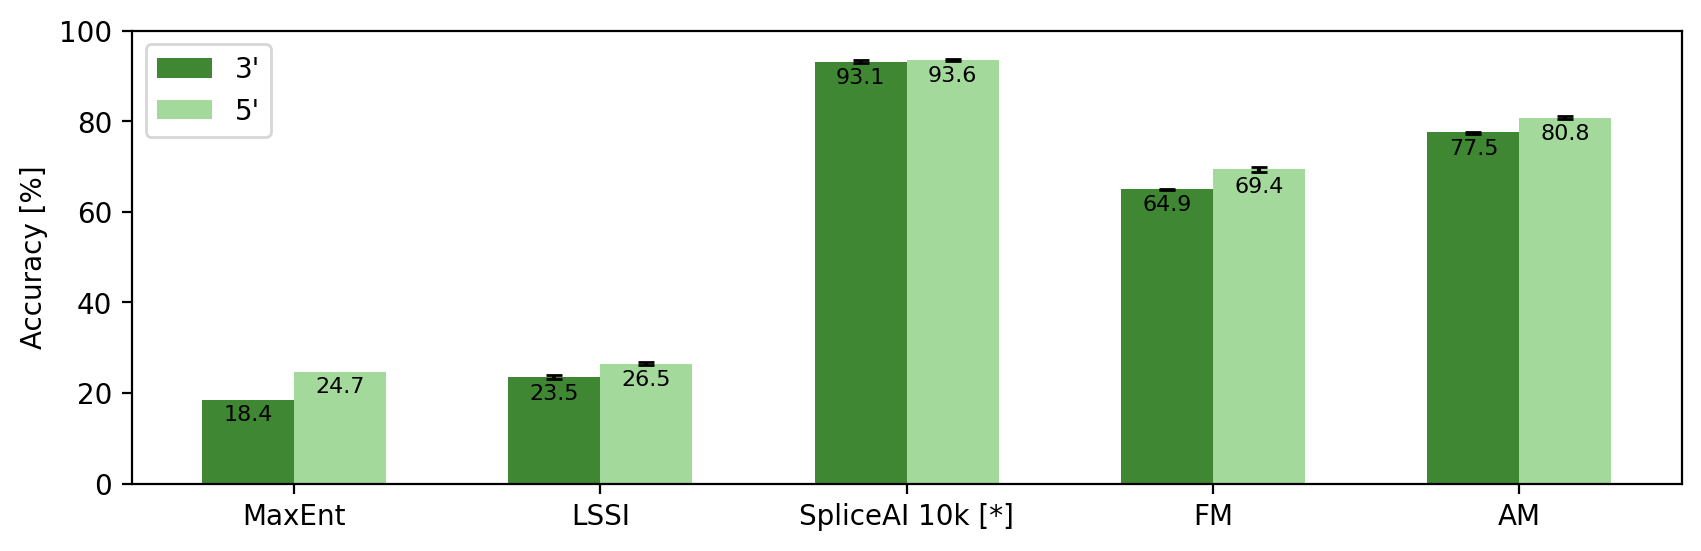

In [6]:
plt.figure(figsize=(10, 3), dpi=200)
res = results_for_main_figure()
plot_topline_results(res, plt.gca())